# **Evaluación 2.**

**Segunda Evaluación Física Computacional 1 (2021-1)**

Se pide resolver numéricamente la ecuación diferencial de un oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal, con ayuda de la función odeint de scipy.integrate.

La ecuación diferencial del oscilador amortiguado es

$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}$$
donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

$$\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}$$
y $\zeta$ es la tasa de amortiguamiento dado por la expresión

$$\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}$$
siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire.

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$).

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:

- Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar.
- Críticamente amortiguado ($\zeta = 1$).
- Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente.
- Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular.

In [2]:
import numpy as np
from scipy import integrate, linalg
import pylab as pl
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.integrate import odeint, solve_ivp
from numpy.linalg import matrix_power as mpow

**Problema1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$.

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$:

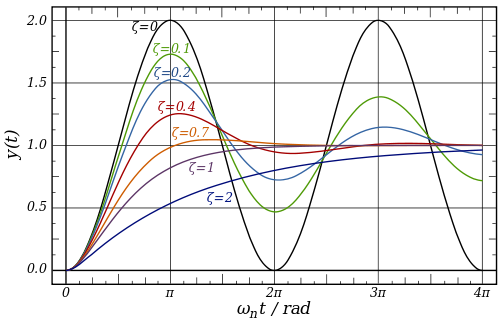

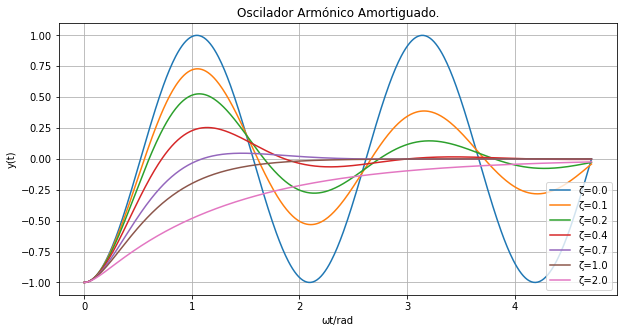

In [3]:
#Definimos la ecuación diferencial para el oscilador armónimo amortiguado
def EDO(y, t, c, w):
    x, dxdt = y
    dydt = -2*w*c*dxdt - (w**2)*x
    return [dxdt, dydt]

#Valores distintos de ζ
c0 = 0.0
c1 = 0.1
c2 = 0.2
c3 = 0.4
c4 = 0.7
c5 = 1.0
c6 = 2.0
t0=0
tmax=1.5*np.pi
Npts=500
t = np.linspace(t0,tmax,Npts)
t_0 = 0.0
y_0 = [-1.0, 0.0]
w = np.sqrt(9/1) # k=9, m=1 

#Soluciones a la ecuación diferencial usando los distintos casos
sls0 = odeint(EDO, y_0, t, args=(c0,w,))
sls1 = odeint(EDO, y_0, t, args=(c1,w,))
sls2 = odeint(EDO, y_0, t, args=(c2,w,))
sls3 = odeint(EDO, y_0, t, args=(c3,w,))
sls4 = odeint(EDO, y_0, t, args=(c4,w,))
sls5 = odeint(EDO, y_0, t, args=(c5,w,))
sls6 = odeint(EDO, y_0, t, args=(c6,w,))
plt.figure(figsize=(10,5))
plt.grid()
plt.title("Oscilador Armónico Amortiguado.")
plt.xlabel('ωt/rad')
plt.ylabel('y(t)')
plt.plot(t, sls0[:,0], label='ζ=0.0')
plt.plot(t, sls1[:,0], label='ζ=0.1')
plt.plot(t, sls2[:,0], label='ζ=0.2')
plt.plot(t, sls3[:,0], label='ζ=0.4')
plt.plot(t, sls4[:,0], label='ζ=0.7')
plt.plot(t, sls5[:,0], label='ζ=1.0')
plt.plot(t, sls6[:,0], label='ζ=2.0')
plt.legend(loc='lower right')
plt.show()

**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

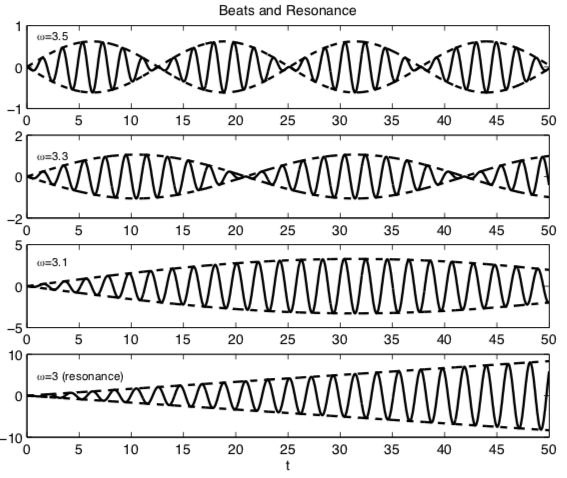

In [4]:
 import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

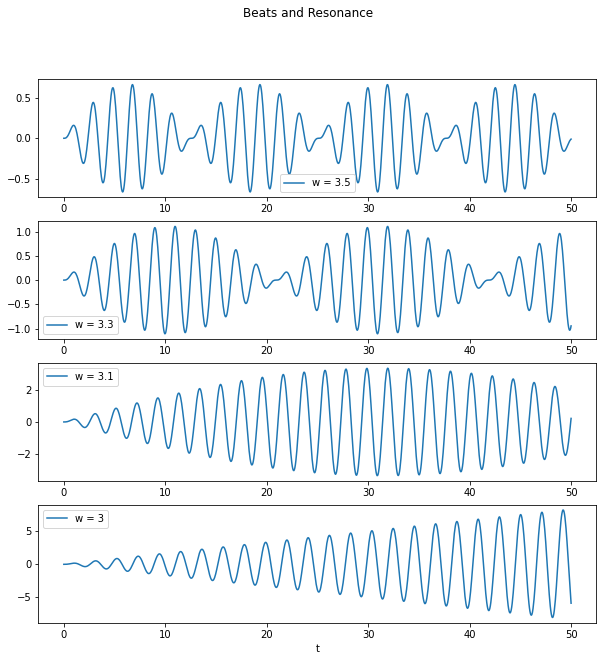

In [12]:
def EDO(y, t, z, f0, frec):
    x, dxdt = y
    dydt = -2*c*f0*dxdt - f0**2*x + np.sin(frec*t)
    return [dxdt, dydt]

#Condiciones iniciales
frec0 = 3.5
frec1 = 3.3
frec2 = 3.1
frec3 = 3.0
t0 = 0.0
y0 = [0.0, 0.0]
f0 = np.sqrt(9/1) 
c = 0.0 
#tiempo
t_0=0
tmax=50
Npts=1000
t = np.linspace(t0,tmax,Npts)

# Soluciones y gráficas 
sls0 = odeint(EDO, y0, t, args=(c,f0,frec0,))
sls1 = odeint(EDO, y0, t, args=(c,f0,frec1,))
sls2 = odeint(EDO, y0, t, args=(c,f0,frec2,))
sls3 = odeint(EDO, y0, t, args=(c,f0,frec3,))
fig, axs = plt.subplots(4,figsize=(10,10))
fig.suptitle('Beats and Resonance')
axs[0].plot(t, sls0[:,0], label='w = 3.5')
axs[1].plot(t, sls1[:,0], label='w = 3.3')
axs[2].plot(t, sls2[:,0], label='w = 3.1')
axs[3].plot(t, sls3[:,0], label='w = 3')
plt.xlabel('t')
axs[0].legend(loc='best');
axs[1].legend(loc='best');
axs[2].legend(loc='best');
axs[3].legend(loc='best');
plt.show()

**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

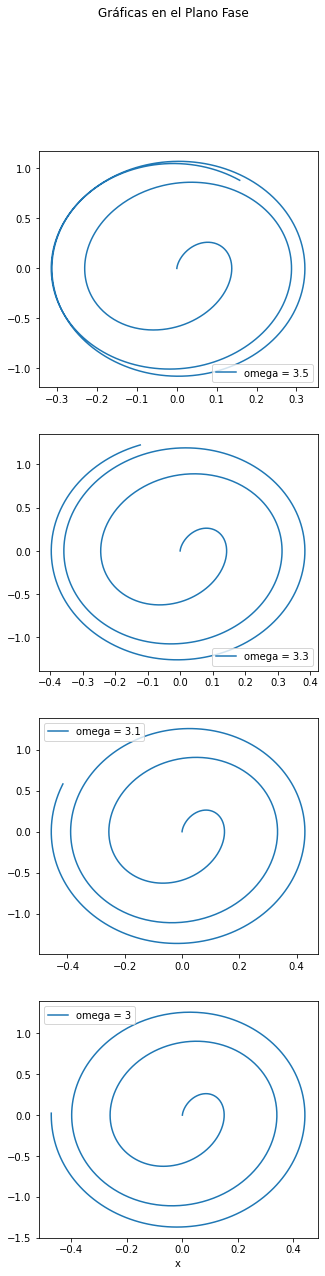

In [11]:
def EDO(y, t, z, f0, frec):
    x, dxdt = y
    dydt = -2*c*f0*dxdt - f0**2*x + np.sin(frec*t)
    return [dxdt, dydt]

#Frecuencias
frec0 = 3.5
frec1 = 3.3
frec2 = 3.1
frec3 = 3.0
#Condiciones iniciales
t_0 = 0.0
y0 = [0.0, 0.0]
c = 0.1 
f0 = np.sqrt(9/1) 
#Tiempo
t0=0
tmax=2*np.pi
Npts=1000
t = np.linspace(t0,tmax,Npts)

# Soluciones y gráficas
sls0 = odeint(EDO, y0, t, args=(c,f0,frec0,))
sls1 = odeint(EDO, y0, t, args=(c,f0,frec1,))
sls2 = odeint(EDO, y0, t, args=(c,f0,frec2,))
sls3 = odeint(EDO, y0, t, args=(c,f0,frec3,))
fig, axs = plt.subplots(4,figsize=(5,20))
fig.suptitle('Gráficas en el Plano Fase')
axs[0].plot(sls0[:,0], sls0[:,1], label='omega = 3.5')
axs[1].plot(sls1[:,0], sls1[:,1], label='omega = 3.3')
axs[2].plot(sls2[:,0], sls2[:,1], label='omega = 3.1')
axs[3].plot(sls3[:,0], sls3[:,1], label='omega = 3')
plt.xlabel('x')
axs[0].legend(loc='best');
axs[1].legend(loc='best');
axs[2].legend(loc='best');
axs[3].legend(loc='best');
plt.show()